Plot the SST in the Canary Current Upwelling System.

In [2]:
import sys
sys.path.insert(0, '..')
import os
import glob
from filament import filament
import datetime
import netCDF4
import cmocean
import logging
import typhon
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from importlib import reload
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cartopyticker
import scipy.io
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
myproj = ccrs.PlateCarree()
coast = cfeature.GSHHSFeature(scale="f")
reload(filament)

<module 'filament.filament' from '../filament/filament.py'>

In [5]:
logger = logging.getLogger("filamentPlot")
logger.setLevel(logging.INFO)
logging.info("Starting")
plotvis = 0

In [6]:
datafile = "/data/ROMS/temp_his.0300.mat"
coordfile = "/data/ROMS/coord.mat"
figdir = "../figures/ROMS/"
capeghir = (-11.8, -9.50, 29.78, 31.81)

In [7]:
if not(os.path.exists(figdir)):
    os.makedirs(figdir)

In [8]:
# Load coordinates
coords = scipy.io.loadmat(coordfile)
lon = coords["lon"]
lat = coords["lat"]
mask = coords["mask"]

In [9]:
# Load fields
results = scipy.io.loadmat(datafile)
T = results["temp"]
T.shape

(5, 290, 290)

In [48]:
with netCDF4.Dataset("/data/ROMS/roms_grd.nc") as nc:
    lonv = nc.variables["lon_rho"][:]
    latv = nc.variables["lat_rho"][:]
    f = nc.variables["f"][:]
    
with netCDF4.Dataset("/data/ROMS/vort10_1410.nc") as nc:
    vort = nc.variables["vrt"][:]
    T = nc.variables["temp"][:]

In [ ]:
def plot_vort_ROMS(lon, lat, vort, figname=None):
    fig = plt.figure(figsize=(12, 12))
    ax = plt.subplot(111, projection=myproj)
    ax.patch.set_facecolor('white')
    pcm = ax.pcolormesh(lonv, latv, vort, cmap='vorticity', alpha=1, vmin=-1.5, vmax=1.5)
    cb = plt.colorbar(pcm, extend="both",shrink=0.7)
    cb.set_label("$\zeta/f$", rotation=0, ha="left", fontsize=14)
    ax.add_feature(coast, linewidth=.2, color=".75")
    filament.decorate_map(ax, capeghir, np.arange(-12., -9., .5), 
                              np.arange(30., 32., .5))
    if figname is not None:
        plt.savefig(figname, dpi=300, bbox_inches="tight", 
                    facecolor="w", transparent=False)
    # plt.show()
    plt.close()

In [46]:
def plot_temp_ROMS(lon, lat, T, figname=None):
    fig = plt.figure(figsize=(12, 12))
    ax = plt.subplot(111, projection=myproj)
    ax.patch.set_facecolor('white')
    pcm = ax.pcolormesh(lonv, latv, T, cmap=plt.cm.RdYlBu_r, alpha=1, vmin=15, vmax=21)
    cb = plt.colorbar(pcm, extend="both",shrink=0.7)
    cb.set_label("T($^{\circ}$C)", rotation=0, ha="left", fontsize=14)
    ax.add_feature(coast, linewidth=.2, color=".75")
    filament.decorate_map(ax, capeghir, np.arange(-12., -9., .5), 
                              np.arange(30., 32., .5))
    if figname is not None:
        plt.savefig(figname, dpi=300, bbox_inches="tight", 
                    facecolor="w", transparent=False)
    # plt.show()
    plt.close()

In [49]:
ntimes = len(T)
for i in range(0, ntimes):
    ii = str(i).zfill(3)
    #figname = os.path.join(figdir, "vort10_1380_{}".format(ii))
    #plot_vort_ROMS(lonv, latv, vort[i,:,:], figname=figname)
    
    figname = os.path.join(figdir, "temp10_1410_{}".format(ii))
    plot_temp_ROMS(lonv, latv, T[i,:,:], figname=figname)

/home/ctroupin/Software/PythonEnvs/Filament3.8/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


## Using Cartopy

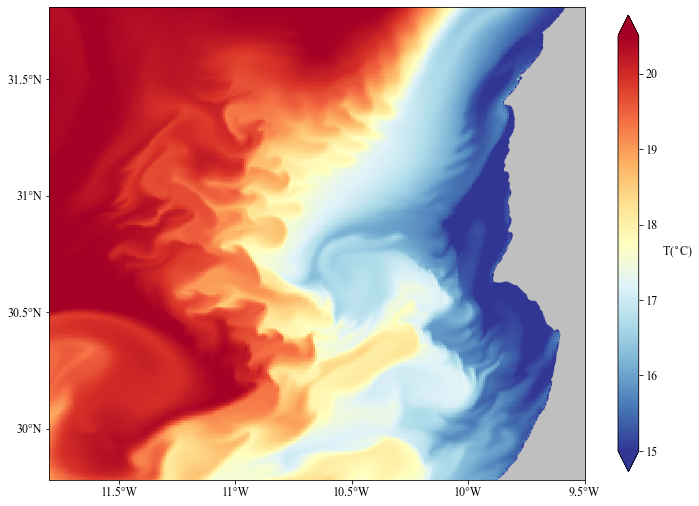

In [41]:
sst = filament.SST()
sst.lon = lon
sst.lat = lat
sst.field = T[0,:,:]

figname = os.path.join(figdir, "SST_800m_ROMS")

fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection=myproj)
ax.patch.set_facecolor('white')
pcm = ax.pcolormesh(sst.lon, sst.lat, sst.field, cmap=plt.cm.RdYlBu_r, alpha=1, vmin=15, vmax=20.5)
cb = plt.colorbar(pcm, extend="both",shrink=0.7)
cb.set_label("T($^{\circ}$C)", rotation=0, ha="left")
ax.add_feature(coast, linewidth=.2, color=".75")
filament.decorate_map(ax, capeghir, np.arange(-12., -9., .5), 
                          np.arange(30., 32., .5))
plt.savefig(figname, dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor(), transparent=False)
plt.show()
plt.close()